### 特徴量の最適な数を調べる：特徴量の数とscoreをグラフ化して、適切な特徴量の数を調べる

In [1]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import pandas_profiling as pp

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)



In [2]:
%%time
# 前処理済みデータの読み込み
h5File = "temp_data/h5/prepared_data_with_last.h5";
key_train = 'prepared_01/train';
key_valid = 'prepared_01/valid';
key_test = 'prepared_01/test';

train = pd.read_hdf(h5File, key_train);
valid = pd.read_hdf(h5File, key_valid);
test = pd.read_hdf(h5File, key_test);


CPU times: user 28.3 s, sys: 52.5 s, total: 1min 20s
Wall time: 1min 58s


In [3]:
gc.collect()

148

  1%|▉                                                                                                                         | 8/1008 [00:00<00:59, 16.73it/s]


説明変数の数n= 10



  1%|▉                                                                                                                         | 8/1008 [00:19<00:59, 16.73it/s]

平均のPR_AUC: 0.825354044019381


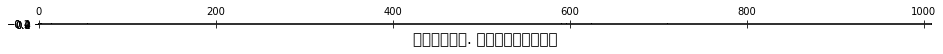

  2%|██▎                                                                                                                      | 19/1008 [01:21<36:43,  2.23s/it]


説明変数の数n= 20



  2%|██▎                                                                                                                      | 19/1008 [01:40<36:43,  2.23s/it]

平均のPR_AUC: 0.8323531244659247


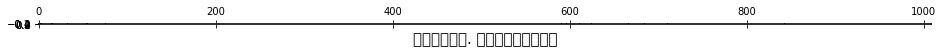

  3%|███▍                                                                                                                     | 29/1008 [02:49<43:37,  2.67s/it]


説明変数の数n= 30



  3%|███▍                                                                                                                     | 29/1008 [03:00<43:37,  2.67s/it]

平均のPR_AUC: 0.8385437990234677


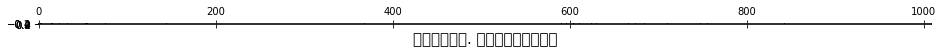

  4%|████▋                                                                                                                    | 39/1008 [04:22<46:42,  2.89s/it]


説明変数の数n= 40



  4%|████▋                                                                                                                    | 39/1008 [04:40<46:42,  2.89s/it]

平均のPR_AUC: 0.8465545814695881


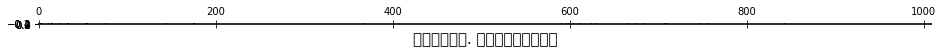

  5%|█████▉                                                                                                                   | 49/1008 [06:03<49:33,  3.10s/it]


説明変数の数n= 50



  5%|█████▉                                                                                                                   | 49/1008 [06:20<49:33,  3.10s/it]

平均のPR_AUC: 0.8498490298550658


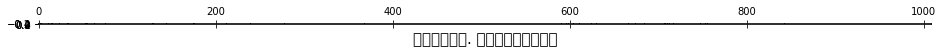

  6%|███████                                                                                                                  | 59/1008 [08:00<56:36,  3.58s/it]


説明変数の数n= 60



  6%|███████                                                                                                                  | 59/1008 [08:10<56:36,  3.58s/it]

平均のPR_AUC: 0.8529829709331643


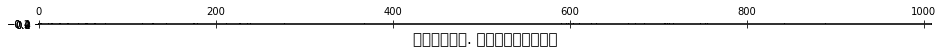

  7%|████████▏                                                                                                              | 69/1008 [10:10<1:02:57,  4.02s/it]


説明変数の数n= 70



  7%|████████▏                                                                                                              | 69/1008 [10:30<1:02:57,  4.02s/it]

平均のPR_AUC: 0.8525378361530969


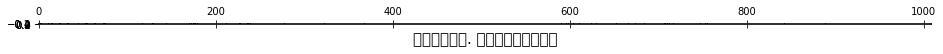

  8%|█████████▎                                                                                                             | 79/1008 [12:47<1:13:39,  4.76s/it]


説明変数の数n= 80



  8%|█████████▎                                                                                                             | 79/1008 [13:00<1:13:39,  4.76s/it]

平均のPR_AUC: 0.8602512254954096


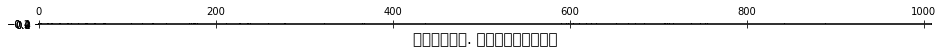

  9%|██████████▌                                                                                                            | 89/1008 [14:58<1:03:41,  4.16s/it]


説明変数の数n= 90



  9%|██████████▌                                                                                                            | 89/1008 [15:10<1:03:41,  4.16s/it]

平均のPR_AUC: 0.8658445744590033


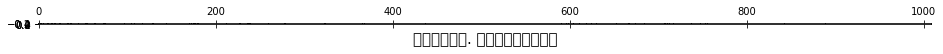

 10%|███████████▋                                                                                                           | 99/1008 [17:08<1:01:06,  4.03s/it]


説明変数の数n= 100


 10%|███████████▋                                                                                                           | 99/1008 [17:50<2:43:50, 10.81s/it]


KeyboardInterrupt: 

In [4]:
# 選ぶ変数の数を探索
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

##make matrix
X = train
y =  valid

ns=[]
scores=[]
cnt = 0
for n in tqdm(range(1,len(X.columns))):
    gc.collect()
    if (n % 10 != 0):
        continue
    if (n > 400) and (n % 50 != 0):
        continue
    cnt = cnt + 1
    print('\n説明変数の数n=',n)
    ##select features
    select = SelectKBest(k=n)
    select.fit(X, y)
    mask = select.get_support()
    X_selected = X.iloc[:,mask]
    ##10-foldCV, LogisticRegression, PR_AUC
    pr_auc = cross_val_score(LogisticRegression(), X_selected, y, scoring="average_precision", cv=10)
    ns.append(n)
    scores.append(np.mean(pr_auc))    
    print('平均のPR_AUC:',scores[cnt-1])

    ## visualization
    plt.matshow(mask.reshape(1, -1), cmap='gray_r')
    plt.tick_params(labelleft = 'off')
    plt.xlabel('使われた特徴. 黒が選択されたもの', fontsize=15)
    plt.show()

In [ ]:
ns

In [ ]:
scores

In [ ]:
%%time
h5File = "temp_data/h5/selectkbest.h5";
key_ns = 'selectkbest/ns';
key_scores = 'selectkbest/scores';

import h5py
with h5py.File(h5File, 'w') as f:
    f[key_ns] = ns
    f[key_scores] = scores


In [ ]:
# %%time
# h5File = "temp_data/h5/selectkbest.h5";
# key_ns = 'selectkbest/ns';
# key_scores = 'selectkbest/scores';

# import h5py
# with h5py.File(h5File, 'r') as f:
#     ns = f[key_ns][:]
#     scores = f[key_scores][:]


In [ ]:
# 特徴量の数とscoreの関係をグラフ化
from bokeh.io import output_file, show
from bokeh.layouts import column
from bokeh.plotting import figure

p = figure(
    title = "n vs. PR_AUC", 
    plot_width=500, plot_height=500,
)
p.line(
#     range(1,len(scores)+1),
    ns,
    scores
)
show(p)

In [ ]:
# 上記グラフから選んだ特徴量数で列を選択する
from tqdm import tqdm
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

n = 500

##make matrix
X = train
y =  valid

scores=[]
print('\n説明変数の数n=',n)
##select features
select = SelectKBest(k=n)
select.fit(X, y)
mask = select.get_support()
X_selected = X.iloc[:,mask]
##10-foldCV, LogisticRegression, PR_AUC
pr_auc = cross_val_score(LogisticRegression(), X_selected, y, scoring="average_precision", cv=10)
score = np.mean(pr_auc)
print('平均のPR_AUC:', score)
    

In [ ]:
# 説明変数の数n= 470
# 平均のPR_AUC: 0.8867232867765921

# 説明変数の数n= 500
# 平均のPR_AUC: 0.886791429352338

In [ ]:
X_selected
